In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt

random_seed = 42
np.random.seed(random_seed)

def merge_asian_labels(label):
  asian_countries = ["China", "Japan", "South Korea", "Taiwan", "Hong Kong"]
  if label in asian_countries:
    return "East Asia"
  return label

df = pd.read_csv('embeddings_namesreplaced.csv')
nationalities = df['nationality']
usa_asia_labels = nationalities.map(merge_asian_labels)

lb = LabelBinarizer()
labels = lb.fit_transform(usa_asia_labels)
labels = labels.reshape(labels.size,)

X_train, X_test, y_train, y_test = train_test_split(df, labels)
features_train = X_train.drop(["name", "nationality", "text", "date"], axis = 1).values
features_test = X_test.drop(["name", "nationality", "text", "date"], axis = 1).values
scaler = StandardScaler()
ft_scaled_train = scaler.fit_transform(features_train)
scaler = StandardScaler()
ft_scaled_test = scaler.fit_transform(features_test)

model = LogisticRegression(random_state=0)
model.fit(ft_scaled_train, y_train)
y_pred = model.predict(ft_scaled_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

               precision    recall  f1-score   support

    East Asia       0.33      0.06      0.11       201
United States       0.99      1.00      0.99     15748

     accuracy                           0.99     15949
    macro avg       0.66      0.53      0.55     15949
 weighted avg       0.98      0.99      0.98     15949



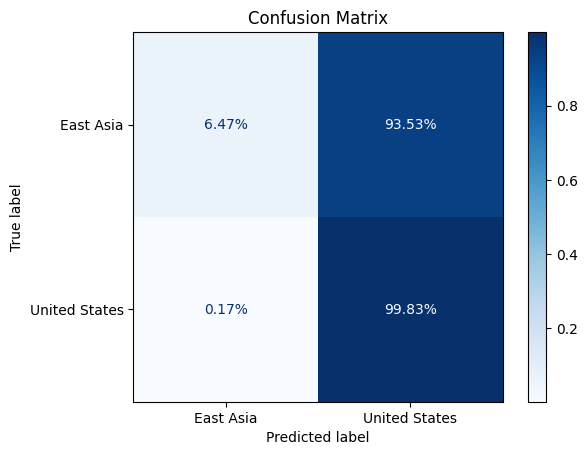

In [16]:
confusion = confusion_matrix(y_test, y_pred)
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lb.classes_)
# fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, values_format='.2%')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [18]:
classification_vals = np.array([x + 2*y for x, y in zip(y_pred, y_test)])

tp = np.array(np.where(classification_vals == 3)).tolist()[0]
fp = np.array(np.where(classification_vals == 1)).tolist()[0]
tn = np.array(np.where(classification_vals == 0)).tolist()[0]
fn = np.array(np.where(classification_vals == 2)).tolist()[0]

pd.set_option('display.max_colwidth', None)
# display(X_test[["name", "nationality", "text"]].iloc[tn])
display(X_test[["name", "nationality", "text"]].iloc[fn])
# display(X_test[["name", "nationality", "text"]].iloc[tp])
# display(X_test[["name", "nationality", "text"]].iloc[fp].tail(50))

,name,nationality,text
22864,Roy Halladay,United States,The first time you faced the Reds they beat you; next two times you faced them you didn't allow a run. And the Giants beat you earlier this season. How much time do you spend looking at those games when you're facing a team that has beaten you? Do you spend more time or are there particular things that you look at in those games?
31310,Cliff Lee,United States,How would you evaluate your performance today?
62124,C.J. Wilson,United States,"Even though it's your first year as a starter, there was a dramatic improvement in the second half, more strikeouts; why were you so much better in the second half, and even here in the post-season with two walks in each of the first two starts?"
32341,Jim Leyland,United States,"There's nine Venezuelans in this World Series. You managed in Venezuela yourself and you have managed many Venezuelan players. Could you talk about why you think it has evolved so much, baseball in Venezuela, and why there are so many good players in the majors?"
8589,Hunter Brown,United States,"How many times do you pitch in elimination games in your career, college or minor leagues?"
26286,Sterling Hitchcock,United States,"When you see another team bench some of their powerful left-handed hitters against\r\nyou, the stats indicate you're more effective against right-handers. How do you feel?"
60015,Tim Wakefield,United States,"Just how much do you enjoy at this point in your career postseason play, the excitement of the second season, and just being part of pitching in the postseason?"
30927,Tommy La Stella,United States,"This has been a kind of a difficult year for you physically with your health, so now at this point in the season, it almost seems like you've been rested and ready for this moment. So how are you feeling physically and how fresh do you feel out there?"
9172,Madison Bumgarner,United States,"Did the relief stint in Philadelphia prepare you for the pressure because that was pretty intense? And could you compare the pressure between that relief stint in Philly and tonight. And also about your stuff tonight, was anything working better than any other pitch?"
8588,Hunter Brown,United States,"How many times do you pitch in elimination games in your career, college or minor leagues?"
